# Ensemble

- 앙상블 의미 : 함께, 동시에, 협력하여 등을 뜻하는 프랑스어.
- 영어로는 합창단, 무용단, 합주단 등을 의미한다.
- 머신러닝에서 `앙상블` : 여러 개의 예측 모델을 조합하여 하나의 예측 결과를 만드는 기법

주요 방법
- 배깅(baggin) : **부트스트랩 샘플링**을 통해 여러 모델을 학습!
- 부스팅( boosting) : 이전 단계, 이전 모델 오류를 보완하면서 순차적으로 학습
- 스태킹(stacking) : 여러 모델의 예측을 새로운 모델의 입력으로 사용

장점
- 단일 모델 보다 일반적으로 높은 성능
- 예) 앙상블 결과는 일반모델 성능보다 항상 높다
- 노이즈에 대해서 강건

단점
- 연산량이 높다
- 모델해석이 좀 더 어려워짐

# 랜덤 포레스트 (Random Forest)
- 베깅의 일종
- 단일 분류 알고리즘을 사용
- 결과 결합 : 투표(Voting) / 평균화
- feature Important를 제공

In [3]:
# 라이브러리 임포트
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [4]:
iris = load_iris()
X , y = iris.data , iris.target

In [ ]:
# 훈련데이터와 테스트데이터 분류 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
# 모델 훈련
rf_classification = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf_classification.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [7]:
# 예측
y_pred = rf_classification.predict(X_test)

In [8]:
# 정확도 평가
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 1.0


# 특성 중요도_ feature importance

In [9]:
feature_importance = rf_classification.feature_importances_

In [10]:
feature_names = iris.feature_names

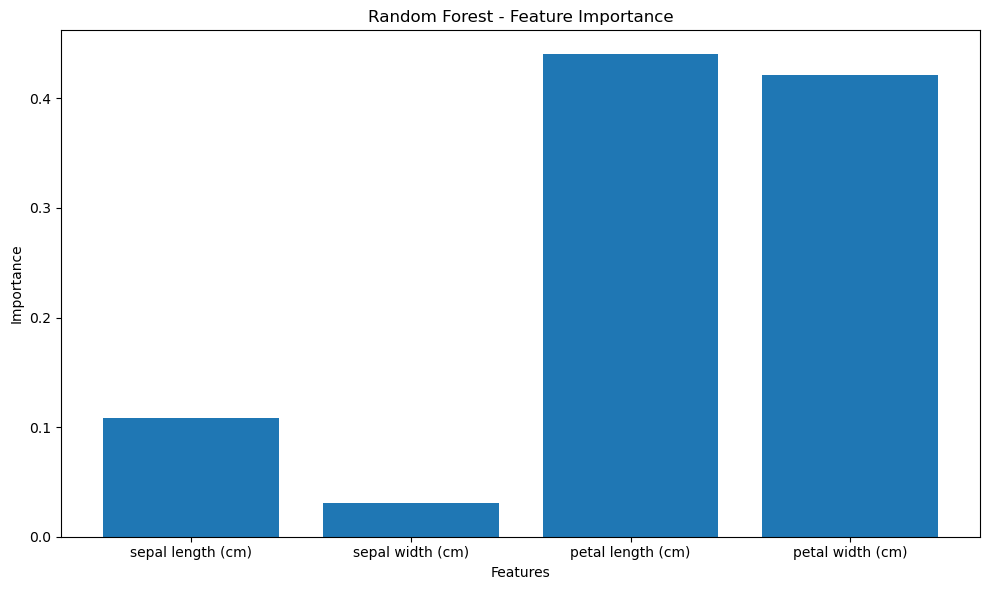

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# 와인 데이터셋 

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 특성과 타겟 분리
X = data.drop("quality", axis=1)
y = data["quality"]

In [16]:
# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 학습 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# 랜덤 포레스트 모델 생성 및 학습
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42) #모델을 불러옴
# n_estimators인자 설정가능
# max_features 트리 갯수 설정
rf_classifier.fit(X_train, y_train) # 훈련

RandomForestClassifier(random_state=42)

### 참고) n_estimators 매개변수

- n_estimators는 랜덤 포레스트에서 생성할 결정 트리의 개수를 지정
- 각 트리는 데이터의 부분집합(부트스트랩 샘플)과 특성의 부분집합을 사용하여 학습됩니다.
- 최종 예측은 이 모든 트리들의 예측을 종합하여 결정

### 영향:

- 일반적으로 n_estimators 값이 증가할수록 모델의 성능이 향상됩니다.
- 그러나 특정 지점 이후로는 성능 향상이 미미해지고 계산 비용만 증가할 수 있습니다.

In [19]:
# 테스트 세트에 대한 예측
y_pred = rf_classifier.predict(X_test)

In [20]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred )
print(f"Accuracy: {accuracy}")

Accuracy: 0.65


In [21]:
classification_report(y_test, y_pred, zero_division=0)

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        10\n           5       0.71      0.74      0.72       130\n           6       0.62      0.68      0.65       132\n           7       0.63      0.52      0.57        42\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.65       320\n   macro avg       0.33      0.32      0.32       320\nweighted avg       0.62      0.65      0.64       320\n'

# 특성중요도

In [22]:
# 특성 중요도 출력
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(5))

                      importance
alcohol                 0.148987
sulphates               0.115690
total sulfur dioxide    0.102300
volatile acidity        0.096902
density                 0.094191


# 교차검증 & 그리드서치
- 교차 검증 : `cross_val_score`


In [23]:
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.525      0.553125   0.603125   0.565625   0.59247649]
Mean CV Score: 0.5678702978056427


# 그리드 탐색이란?
- 최적의 하이퍼파라미터를 탐색하는 방법
- 탐색 과정
    1. 하이퍼파라미터 그리드 정의
    2. 모든 조합을 시도
    3. 교차 검증 -> 일반화 성능을 평가
    4. 최적의 조합 선택



In [24]:
#파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [25]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [26]:
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [27]:
y_pred_best = grid_search.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best}")

Best Model Accuracy: 0.65
